# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Print the city count to confirm sufficient count
len(cities)

594

In [4]:
# replace spaces in city names
cities = [i.replace(' ', '+') for i in cities]

for i in cities:
    print(i)

sirjan
hilo
barrow
ust-bolsheretsk
qaanaaq
hermanus
tabiauea
albany
broken+hill
acapulco
kapaa
temaraia
maniitsoq
barentsburg
sinnar
rikitea
airai
vila+franca+do+campo
cabo+san+lucas
lagoa
lodwar
tsihombe
nemea
khatanga
cidreira
katsuura
palabuhanratu
mbandaka
busselton
bankura
lebu
new+norfolk
jamestown
dikson
havelock
norman+wells
maloshuyka
saleaula
ushuaia
butaritari
husavik
tiksi
rawson
port+alfred
san+jose+de+gracia
samusu
coahuayana
olinda
margate
lee
nabire
reforma
orotukan
avarua
ostrovnoy
tomesti
meyungs
bluff
sisimiut
andra
coihaique
bilibino
saint-philippe
flin+flon
punta+arenas
abu+samrah
saint-joseph
arraial+do+cabo
lerwick
dalvik
east+london
felidhoo
torbay
gladstone
yulara
baiyin
adrar
dingle
atuona
taolanaro
champerico
nome
mergui
huazolotitlan
namatanai
cabinda
banda+aceh
shchelyayur
belushya+guba
tir+pol
kangaatsiaq
lompoc
sao+filipe
upernavik
bud
omsukchan
presidencia+roque+saenz+pena
bambous+virieux
egvekinot
clyde+river
calama
abu+dhabi
castro
bakchar
songea
dutlw

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_data = []

base_url = f'https://api.openweathermap.org/data/2.5/weather?'

counter = 0

for city in cities:
    counter = counter + 1
    print(f'Making request number {counter} for current weather data in {city}.')
    
    try:
        url = f'{base_url}q={city}&appid={weather_api_key}'
        response = requests.get(url).json()
        weather_data.append(response)
        
    except:
        print(f'City not found. Skipping...')

Making request number 1 for current weather data in sirjan.
Making request number 2 for current weather data in hilo.
Making request number 3 for current weather data in barrow.
Making request number 4 for current weather data in ust-bolsheretsk.
Making request number 5 for current weather data in qaanaaq.
Making request number 6 for current weather data in hermanus.
Making request number 7 for current weather data in tabiauea.
Making request number 8 for current weather data in albany.
Making request number 9 for current weather data in broken+hill.
Making request number 10 for current weather data in acapulco.
Making request number 11 for current weather data in kapaa.
Making request number 12 for current weather data in temaraia.
Making request number 13 for current weather data in maniitsoq.
Making request number 14 for current weather data in barentsburg.
Making request number 15 for current weather data in sinnar.
Making request number 16 for current weather data in rikitea.
Maki

Making request number 130 for current weather data in aflu.
Making request number 131 for current weather data in mataura.
Making request number 132 for current weather data in attawapiskat.
Making request number 133 for current weather data in wahiawa.
Making request number 134 for current weather data in bathsheba.
Making request number 135 for current weather data in cayenne.
Making request number 136 for current weather data in bredasdorp.
Making request number 137 for current weather data in limulunga.
Making request number 138 for current weather data in bar+harbor.
Making request number 139 for current weather data in chokurdakh.
Making request number 140 for current weather data in bethel.
Making request number 141 for current weather data in nizhneyansk.
Making request number 142 for current weather data in mount+gambier.
Making request number 143 for current weather data in marawi.
Making request number 144 for current weather data in ambovombe.
Making request number 145 for 

Making request number 258 for current weather data in sao+miguel+do+araguaia.
Making request number 259 for current weather data in nantucket.
Making request number 260 for current weather data in estevan.
Making request number 261 for current weather data in ruidoso.
Making request number 262 for current weather data in san+policarpo.
Making request number 263 for current weather data in aykhal.
Making request number 264 for current weather data in emerald.
Making request number 265 for current weather data in phan+rang.
Making request number 266 for current weather data in dunedin.
Making request number 267 for current weather data in constitucion.
Making request number 268 for current weather data in bundaberg.
Making request number 269 for current weather data in nelson+bay.
Making request number 270 for current weather data in sumbe.
Making request number 271 for current weather data in isangel.
Making request number 272 for current weather data in pevek.
Making request number 273

Making request number 385 for current weather data in high+level.
Making request number 386 for current weather data in galle.
Making request number 387 for current weather data in itacare.
Making request number 388 for current weather data in maarianhamina.
Making request number 389 for current weather data in palmer.
Making request number 390 for current weather data in krasnoselkup.
Making request number 391 for current weather data in arlit.
Making request number 392 for current weather data in clarksdale.
Making request number 393 for current weather data in tigil.
Making request number 394 for current weather data in walvis+bay.
Making request number 395 for current weather data in rong+kwang.
Making request number 396 for current weather data in mareeba.
Making request number 397 for current weather data in jaljulye.
Making request number 398 for current weather data in antalaha.
Making request number 399 for current weather data in moranbah.
Making request number 400 for curren

Making request number 514 for current weather data in berlevag.
Making request number 515 for current weather data in maldonado.
Making request number 516 for current weather data in makinsk.
Making request number 517 for current weather data in indianola.
Making request number 518 for current weather data in kiruna.
Making request number 519 for current weather data in kungurtug.
Making request number 520 for current weather data in les+cayes.
Making request number 521 for current weather data in koson.
Making request number 522 for current weather data in oviedo.
Making request number 523 for current weather data in luderitz.
Making request number 524 for current weather data in makarov.
Making request number 525 for current weather data in guadix.
Making request number 526 for current weather data in yatou.
Making request number 527 for current weather data in hit.
Making request number 528 for current weather data in meadow+lake.
Making request number 529 for current weather data i

In [6]:
pprint(weather_data)

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 29.452, 'lon': 55.6814},
  'dt': 1615077456,
  'id': 114259,
  'main': {'feels_like': 278.51,
           'grnd_level': 825,
           'humidity': 44,
           'pressure': 1015,
           'sea_level': 1015,
           'temp': 281.97,
           'temp_max': 281.97,
           'temp_min': 281.97},
  'name': 'Sīrjān',
  'sys': {'country': 'IR', 'sunrise': 1615084592, 'sunset': 1615126823},
  'timezone': 12600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 304, 'speed': 1.58}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 19.7297, 'lon': -155.09},
  'dt': 1615076888,
  'id': 5855927,
  'main': {'feels_like': 294.84,
           'humidity': 61,
           'pressure': 1019,
           'temp': 295.29,
           'temp_max': 299.15,
           'temp_min'

  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 42.097, 'lon': -79.2353},
  'dt': 1615077228,
  'id': 5122534,
  'main': {'feels_like': 264.53,
           'humidity': 95,
           'pressure': 1021,
           'temp': 269.42,
           'temp_max': 269.82,
           'temp_min': 269.26},
  'name': 'Jamestown',
  'sys': {'country': 'US',
          'id': 4588,
          'sunrise': 1615031024,
          'sunset': 1615072370,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 293, 'speed': 3.35}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 73.5069, 'lon': 80.5464},
  'dt': 1615076913,
  'id': 1507390,
  'main': {'feels_like': 236.09,
           'grnd_level': 1005,
           'humidity': 88,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 243.23,
  

               'main': 'Clouds'}],
  'wind': {'deg': 271, 'speed': 1.45}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -21.2078, 'lon': -159.775},
  'dt': 1615077470,
  'id': 4035715,
  'main': {'feels_like': 302.86,
           'humidity': 94,
           'pressure': 1008,
           'temp': 300.15,
           'temp_max': 300.15,
           'temp_min': 300.15},
  'name': 'Avarua',
  'rain': {'1h': 1.24},
  'sys': {'country': 'CK',
          'id': 7271,
          'sunrise': 1615048702,
          'sunset': 1615093343,
          'type': 1},
  'timezone': -36000,
  'visibility': 10000,
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 260, 'speed': 6.17}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 68.0531, 'lon': 39.5131},
  'dt': 1615076941,
  'id': 556268,
  'main': {'feels_like': 251.52,
           'grnd_level':

          'id': 998,
          'sunrise': 1615024902,
          'sunset': 1615065772,
          'type': 1},
  'timezone': -12600,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 210, 'speed': 5.66}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -23.85, 'lon': 151.25},
  'dt': 1615077475,
  'id': 2165478,
  'main': {'feels_like': 301.3,
           'humidity': 54,
           'pressure': 1014,
           'temp': 302.15,
           'temp_max': 302.15,
           'temp_min': 302.15},
  'name': 'Gladstone',
  'rain': {'1h': 0.24},
  'sys': {'country': 'AU',
          'id': 9526,
          'sunrise': 1615060385,
          'sunset': 1615105165,
          'type': 1},
  'timezone': 36000,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Ra

  'coord': {'lat': -10.6833, 'lon': 35.65},
  'dt': 1615077483,
  'id': 877401,
  'main': {'feels_like': 294.7,
           'humidity': 100,
           'pressure': 1016,
           'temp': 292.15,
           'temp_max': 292.15,
           'temp_min': 292.15},
  'name': 'Songea',
  'rain': {'1h': 1.54},
  'sys': {'country': 'TZ',
          'id': 2623,
          'sunrise': 1615088473,
          'sunset': 1615132556,
          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 62, 'speed': 0.98}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -23.9833, 'lon': 23.9},
  'dt': 1615077483,
  'id': 933787,
  'main': {'feels_like': 293.54,
           'grnd_level': 892,
           'humidity': 42,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 295.24,
           'temp_max': 295.

           'sea_level': 1002,
           'temp': 268.22,
           'temp_max': 268.22,
           'temp_min': 268.22},
  'name': 'Vanavara',
  'snow': {'1h': 0.24},
  'sys': {'country': 'RU', 'sunrise': 1615074770, 'sunset': 1615114282},
  'timezone': 25200,
  'visibility': 664,
  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 224, 'speed': 5.31}},
 {'base': 'stations',
  'clouds': {'all': 93},
  'cod': 200,
  'coord': {'lat': 71.9167, 'lon': 114.0833},
  'dt': 1615076923,
  'id': 2017155,
  'main': {'feels_like': 236.53,
           'grnd_level': 1013,
           'humidity': 85,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 242.56,
           'temp_max': 242.56,
           'temp_min': 242.56},
  'name': 'Saskylakh',
  'sys': {'country': 'RU', 'sunrise': 1615073402, 'sunset': 1615109985},
  'timezone': 32400,
  'visibility': 1889,
  'weather': [{'descrip

  'main': {'feels_like': 289.97,
           'humidity': 88,
           'pressure': 1017,
           'temp': 290.15,
           'temp_max': 290.93,
           'temp_min': 289.15},
  'name': 'Somerset West',
  'sys': {'country': 'ZA',
          'id': 1899,
          'sunrise': 1615091860,
          'sunset': 1615137245,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 20, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 2},
  'cod': 200,
  'coord': {'lat': -34.0033, 'lon': 24.7314},
  'dt': 1615076951,
  'id': 986717,
  'main': {'feels_like': 293.85,
           'humidity': 75,
           'pressure': 1015,
           'temp': 292.59,
           'temp_max': 292.59,
           'temp_min': 292.59},
  'name': 'Kruisfontein',
  'sys': {'country': 'ZA',
          'id': 2035063,
          'sunrise': 1615090444,
          '

  'wind': {'deg': 340, 'gust': 1.34, 'speed': 0.45}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 35.7333, 'lon': 140.8333},
  'dt': 1615077504,
  'id': 2112802,
  'main': {'feels_like': 271.5,
           'humidity': 57,
           'pressure': 1029,
           'temp': 279.79,
           'temp_max': 280.37,
           'temp_min': 278.15},
  'name': 'Hasaki',
  'sys': {'country': 'JP',
          'id': 7955,
          'sunrise': 1615064354,
          'sunset': 1615106195,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 40, 'speed': 8.75}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 4.8699, 'lon': -2.2405},
  'dt': 1615077504,
  'id': 2303611,
  'main': {'feels_like': 303.23,
           'grnd_level': 1010,
           'humidity': 86,
           'p

               'main': 'Clouds'}],
  'wind': {'deg': 8, 'speed': 1.83}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': -26.5333, 'lon': 151.8333},
  'dt': 1615077509,
  'id': 2161376,
  'main': {'feels_like': 297.99,
           'humidity': 61,
           'pressure': 1016,
           'temp': 298.15,
           'temp_max': 298.15,
           'temp_min': 298.15},
  'name': 'Kingaroy',
  'sys': {'country': 'AU',
          'id': 9535,
          'sunrise': 1615060166,
          'sunset': 1615105103,
          'type': 1},
  'timezone': 36000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 30, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -33.9258, 'lon': 18.4232},
  'dt': 1615077301,
  'id': 3369157,
  'main': {'feels_like': 291.19,
 

  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 63, 'speed': 2.85}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 70.0311, 'lon': 20.9714},
  'dt': 1615077515,
  'id': 777682,
  'main': {'feels_like': 262.24,
           'grnd_level': 1003,
           'humidity': 89,
           'pressure': 1003,
           'sea_level': 1003,
           'temp': 273.07,
           'temp_max': 273.07,
           'temp_min': 273.07},
  'name': 'Skjervøy',
  'snow': {'1h': 0.10700000000000001},
  'sys': {'country': 'NO', 'sunrise': 1615095329, 'sunset': 1615132744},
  'timezone': 3600,
  'visibility': 4329,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 33, 'speed': 12.31}},
 {'base': 'stations',
  'clouds': {'all': 2},
  'cod': 200,
  'coord': {'lat': 40.2833, 'lon': 9

 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': -7.4706, 'lon': -34.8086},
  'dt': 1615077522,
  'id': 3391889,
  'main': {'feels_like': 303.55,
           'humidity': 89,
           'pressure': 1014,
           'temp': 299.15,
           'temp_max': 299.15,
           'temp_min': 299.15},
  'name': 'Pitimbu',
  'sys': {'country': 'BR',
          'id': 8391,
          'sunrise': 1615019059,
          'sunset': 1615063013,
          'type': 1},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 100, 'speed': 2.06}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 92},
  'cod': 200,
  'coord': {'lat': 69.3833, 'lon': 178.4167},
  'dt': 1615076936,
  'id': 2123814,
  'main': {'feels_like': 242.16,
           'grnd_level': 998,
           'humidity': 78,
           'pressure

  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 250, 'speed': 8.75}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 63.7256, 'lon': 8.834},
  'dt': 1615077527,
  'id': 3139597,
  'main': {'feels_like': 257.85,
           'humidity': 86,
           'pressure': 1009,
           'temp': 271.15,
           'temp_max': 271.15,
           'temp_min': 271.15},
  'name': 'Sistranda',
  'snow': {'1h': 0.36},
  'sys': {'country': 'NO',
          'id': 1647,
          'sunrise': 1615097443,
          'sunset': 1615136455,
          'type': 1},
  'timezone': 3600,
  'visibility': 3000,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 10, 'gust': 21.09, 'speed': 15.43}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord'

               'main': 'Clouds'}],
  'wind': {'deg': 10, 'speed': 1.77}},
 {'base': 'stations',
  'clouds': {'all': 96},
  'cod': 200,
  'coord': {'lat': 63.4453, 'lon': 120.3167},
  'dt': 1615076977,
  'id': 2013639,
  'main': {'feels_like': 249.52,
           'grnd_level': 998,
           'humidity': 92,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 253.93,
           'temp_max': 253.93,
           'temp_min': 253.93},
  'name': 'Verkhnevilyuysk',
  'sys': {'country': 'RU', 'sunrise': 1615070724, 'sunset': 1615109672},
  'timezone': 32400,
  'visibility': 2959,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 137, 'speed': 1.17}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 32.3502, 'lon': -85.1999},
  'dt': 1615077534,
  'id': 4047434,
  'main': {'feels_like': 282.73,
           'humidity': 47,
           'pr

  'cod': 200,
  'coord': {'lat': 44.3945, 'lon': -1.1672},
  'dt': 1615077540,
  'id': 3032556,
  'main': {'feels_like': 273.23,
           'humidity': 93,
           'pressure': 1024,
           'temp': 276.15,
           'temp_max': 276.15,
           'temp_min': 276.15},
  'name': 'Biscarrosse',
  'sys': {'country': 'FR',
          'id': 6448,
          'sunrise': 1615098694,
          'sunset': 1615140004,
          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 205, 'speed': 1.77}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 50.6789, 'lon': 156.125},
  'dt': 1615077540,
  'id': 2121385,
  'main': {'feels_like': 250.3,
           'grnd_level': 1003,
           'humidity': 89,
           'pressure': 1004,
           'sea_level': 1004,
           'temp': 263.59,
           'temp_max'

  'cod': 200,
  'coord': {'lat': -2.5744, 'lon': 150.7967},
  'dt': 1615077138,
  'id': 2094342,
  'main': {'feels_like': 305.12,
           'grnd_level': 1008,
           'humidity': 72,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 301.8,
           'temp_max': 301.8,
           'temp_min': 301.8},
  'name': 'Kavieng',
  'rain': {'1h': 0.21},
  'sys': {'country': 'PG', 'sunrise': 1615061025, 'sunset': 1615104742},
  'timezone': 36000,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 77, 'speed': 2.82}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 55.7435, 'lon': -97.8558},
  'dt': 1615077472,
  'id': 6165406,
  'main': {'feels_like': 273.96,
           'humidity': 56,
           'pressure': 1008,
           'temp': 278.15,
           'temp_max': 278.15,
           'temp_min': 278.15},
  'name':

           'temp': 294.15,
           'temp_max': 294.15,
           'temp_min': 294.15},
  'name': 'Praia',
  'sys': {'country': 'CV',
          'id': 2462,
          'sunrise': 1615016874,
          'sunset': 1615059775,
          'type': 1},
  'timezone': -3600,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 30, 'speed': 12.35}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': -33.8667, 'lon': 121.9},
  'dt': 1615077550,
  'id': 2071860,
  'main': {'feels_like': 293.94,
           'humidity': 100,
           'pressure': 1016,
           'temp': 292.15,
           'temp_max': 292.15,
           'temp_min': 292.15},
  'name': 'Esperance',
  'sys': {'country': 'AU',
          'id': 9525,
          'sunrise': 1615067115,
          'sunset': 1615112521,
          'type': 1},
  'timezone': 28800,
  'visibility': 10000,
  'we

  'sys': {'country': 'PT',
          'id': 6900,
          'sunrise': 1615100375,
          'sunset': 1615141897,
          'type': 1},
  'timezone': 0,
  'visibility': 8000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 72, 'speed': 1.27}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -19.9842, 'lon': 57.6142},
  'dt': 1615077559,
  'id': 934649,
  'main': {'feels_like': 303.69,
           'humidity': 78,
           'pressure': 1006,
           'temp': 300.93,
           'temp_max': 300.93,
           'temp_min': 300.93},
  'name': 'Cap Malheureux',
  'rain': {'1h': 2.75},
  'sys': {'country': 'MU',
          'id': 2002134,
          'sunrise': 1615082970,
          'sunset': 1615127517,
          'type': 3},
  'timezone': 14400,
  'visibility': 6022,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id'

  'main': {'feels_like': 241.43,
           'grnd_level': 991,
           'humidity': 86,
           'pressure': 1001,
           'sea_level': 1001,
           'temp': 247.26,
           'temp_max': 247.26,
           'temp_min': 247.26},
  'name': "Tigil'",
  'sys': {'country': 'RU', 'sunrise': 1615061076, 'sunset': 1615100915},
  'timezone': 43200,
  'visibility': 5566,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 307, 'speed': 2.91}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -22.9575, 'lon': 14.5053},
  'dt': 1615077567,
  'id': 3359638,
  'main': {'feels_like': 289.94,
           'humidity': 82,
           'pressure': 1013,
           'temp': 290.15,
           'temp_max': 290.15,
           'temp_min': 290.15},
  'name': 'Walvis Bay',
  'sys': {'country': 'NA',
          'id': 2288,
          'sunrise': 1615093239,
          'sunset

               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 309, 'speed': 2.7}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 37.7167, 'lon': 20.8333},
  'dt': 1615077573,
  'id': 258241,
  'main': {'feels_like': 278.47,
           'humidity': 100,
           'pressure': 1023,
           'temp': 281.15,
           'temp_max': 281.15,
           'temp_min': 281.15},
  'name': 'Lithakia',
  'sys': {'country': 'GR',
          'id': 6608,
          'sunrise': 1615093188,
          'sunset': 1615134951,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 11, 'speed': 3.17}},
 {'base': 'stations',
  'clouds': {'all': 29},
  'cod': 200,
  'coord': {'lat': 20.15, 'lon': 92.9},
  'dt': 1615077573,
  'id': 1295765,
  'main': {'feels_like': 293.35,
  

  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 269, 'speed': 2.14}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 47.1821, 'lon': 8.4636},
  'dt': 1615077579,
  'id': 2661228,
  'main': {'feels_like': 269.73,
           'humidity': 93,
           'pressure': 1026,
           'temp': 272.34,
           'temp_max': 272.59,
           'temp_min': 272.04},
  'name': 'Cham',
  'sys': {'country': 'CH',
          'id': 6933,
          'sunrise': 1615096496,
          'sunset': 1615137579,
          'type': 1},
  'timezone': 3600,
  'visibility': 6000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 'speed': 0.54}},
 {'base': 'stations',
  'clouds': {'all': 96},
  'cod': 200,
  'coord': {'lat': -18.5067, 'lon': -54.76},
  'dt': 1615077579,
  

           'temp_min': 300.15},
  'name': 'Keffi',
  'sys': {'country': 'NG',
          'id': 1173,
          'sunrise': 1615095572,
          'sunset': 1615138787,
          'type': 1},
  'timezone': 3600,
  'visibility': 8000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 90, 'speed': 1.03}},
 {'base': 'stations',
  'clouds': {'all': 10},
  'cod': 200,
  'coord': {'lat': 17.8868, 'lon': -77.5902},
  'dt': 1615077584,
  'id': 3491161,
  'main': {'feels_like': 297.34,
           'grnd_level': 987,
           'humidity': 74,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 295.89,
           'temp_max': 295.89,
           'temp_min': 295.89},
  'name': 'Bull Savanna',
  'sys': {'country': 'JM', 'sunrise': 1615029919, 'sunset': 1615072685},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '

  'dt': 1615077591,
  'id': 1507638,
  'main': {'feels_like': 262.58,
           'grnd_level': 988,
           'humidity': 94,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 268.67,
           'temp_max': 268.67,
           'temp_min': 268.67},
  'name': 'Chunoyar',
  'sys': {'country': 'RU', 'sunrise': 1615075746, 'sunset': 1615115685},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 242, 'speed': 4.93}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -4.5772, 'lon': -81.2719},
  'dt': 1615077592,
  'id': 3691582,
  'main': {'feels_like': 301.72,
           'humidity': 69,
           'pressure': 1008,
           'temp': 300.15,
           'temp_max': 300.15,
           'temp_min': 300.15},
  'name': 'Talara',
  'sys': {'country': 'PE',
          'id': 8685,
          'sun

           'temp_max': 271.26,
           'temp_min': 271.26},
  'name': 'Ape',
  'snow': {'1h': 0.486},
  'sys': {'country': 'LV', 'sunrise': 1615092671, 'sunset': 1615132656},
  'timezone': 7200,
  'visibility': 2011,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 312, 'speed': 6.65}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 35.5362, 'lon': -100.9599},
  'dt': 1615077318,
  'id': 5527953,
  'main': {'feels_like': 281.4,
           'humidity': 26,
           'pressure': 1021,
           'temp': 288.58,
           'temp_max': 289.15,
           'temp_min': 288.15},
  'name': 'Pampa',
  'sys': {'country': 'US',
          'id': 5389,
          'sunrise': 1615036006,
          'sunset': 1615077814,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
            

           'sea_level': 1014,
           'temp': 293.79,
           'temp_max': 293.79,
           'temp_min': 293.79},
  'name': 'Lüderitz',
  'sys': {'country': 'NA', 'sunrise': 1615092977, 'sunset': 1615137885},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 174, 'speed': 6.12}},
 {'base': 'stations',
  'clouds': {'all': 59},
  'cod': 200,
  'coord': {'lat': 48.6333, 'lon': 142.8},
  'dt': 1615077607,
  'id': 2123614,
  'main': {'feels_like': 257.11,
           'grnd_level': 1021,
           'humidity': 86,
           'pressure': 1021,
           'sea_level': 1021,
           'temp': 264.34,
           'temp_max': 264.34,
           'temp_min': 264.34},
  'name': 'Makarov',
  'sys': {'country': 'RU', 'sunrise': 1615064364, 'sunset': 1615105241},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
   

  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 15, 'lon': -83.2333},
  'dt': 1615077613,
  'id': 3608828,
  'main': {'feels_like': 301.95,
           'humidity': 74,
           'pressure': 1012,
           'temp': 300.15,
           'temp_max': 300.15,
           'temp_min': 300.15},
  'name': 'Iralaya',
  'sys': {'country': 'HN',
          'id': 7087,
          'sunrise': 1615031203,
          'sunset': 1615074109,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 50, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 7.7102, 'lon': 81.6924},
  'dt': 1615077613,
  'id': 1250161,
  'main': {'feels_like': 303.26,
           'grnd_level': 1009,
           'humidity': 84,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 299.26,
        

           'grnd_level': 995,
           'humidity': 76,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 299.64,
           'temp_max': 299.64,
           'temp_min': 299.64},
  'name': 'Orocué',
  'sys': {'country': 'CO', 'sunrise': 1615028111, 'sunset': 1615071491},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 73, 'speed': 2.51}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 50.1001, 'lon': -91.917},
  'dt': 1615077066,
  'id': 6148373,
  'main': {'feels_like': 266.99,
           'humidity': 34,
           'pressure': 1024,
           'temp': 272.15,
           'temp_max': 272.15,
           'temp_min': 272.15},
  'name': 'Sioux Lookout',
  'sys': {'country': 'CA',
          'id': 979,
          'sunrise': 1615034409,
          'sunset': 1615075071,
          'type

  'dt': 1615077627,
  'id': 89113,
  'main': {'feels_like': 286.3,
           'grnd_level': 1018,
           'humidity': 47,
           'pressure': 1018,
           'sea_level': 1018,
           'temp': 289.58,
           'temp_max': 289.58,
           'temp_min': 289.58},
  'name': 'Ajdabiya',
  'sys': {'country': 'LY', 'sunrise': 1615093130, 'sunset': 1615135301},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 320, 'speed': 3.1}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 69.6496, 'lon': 18.957},
  'dt': 1615077627,
  'id': 6453316,
  'main': {'feels_like': 263.63,
           'humidity': 93,
           'pressure': 1003,
           'temp': 267.15,
           'temp_max': 267.15,
           'temp_min': 267.15},
  'name': 'Tromsø',
  'snow': {'1h': 0.36},
  'sys': {'country': 'NO',
          'id': 1681,
  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# empty lists to store values
name_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []
cloud_list = []
humidity_list = []

# use a counter to index into appropriate dictionary within weather_data
line_tracker = 0

# create (to be used later) function to convert from kelvin to fahrenheit
def kelvin_to_f(k):
    return ((9.0/5.0) * (k-273) + 32)   # <- kelvin to farenheit formula


# walk through dataset
for line in weather_data:
    
    # check to see if data exists in specified location
        # if so, grab data 
        # add data to appropriate list

    if weather_data[line_tracker]['cod'] == 200:
        name = weather_data[line_tracker]['name']
        name_list.append(name)
        
    if weather_data[line_tracker]['cod'] == 200:
        lat = weather_data[line_tracker]['coord']['lat']
        lat_list.append(lat)
        
    if weather_data[line_tracker]['cod'] == 200:
        lng = weather_data[line_tracker]['coord']['lon']
        lng_list.append(lng)
        
    if weather_data[line_tracker]['cod'] == 200:
        wind = weather_data[line_tracker]['wind']['speed']
        wind_list.append(wind)
        
    if weather_data[line_tracker]['cod'] == 200:
        cloud = weather_data[line_tracker]['clouds']['all']
        cloud_list.append(cloud)
        
    if weather_data[line_tracker]['cod'] == 200:
        humidity = weather_data[line_tracker]['main']['humidity']
        humidity_list.append(humidity)  
        
    if weather_data[line_tracker]['cod'] == 200:
        temp = weather_data[line_tracker]['main']['temp_max']
        temp = kelvin_to_f(temp)
        temp_list.append(temp)  
        
    line_tracker += 1    


In [10]:
weather_df = pd.DataFrame(list(zip(name_list, lat_list, lng_list, temp_list, wind_list, cloud_list, humidity_list)), 
                          columns = ['Name', 'Latitude', 'Longitude','Temperature(F)', 'Wind Speed(mph)', 'Cloud Coverage', 'Humidity'])

weather_df

,Name,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity
0,Sīrjān,29.4520,55.6814,48.146,1.58,0,44
1,Hilo,19.7297,-155.0900,79.070,2.57,40,61
2,Barrow,71.2906,-156.7887,-7.330,4.63,1,71
3,Qaanaaq,77.4840,-69.3632,-15.088,3.18,0,67
4,Hermanus,-34.4187,19.2345,64.274,0.89,0,79
...,...,...,...,...,...,...,...
531,Delano,35.7688,-119.2470,66.470,4.12,1,44
532,Złocieniec,53.5329,16.0113,35.276,1.79,100,79
533,Hargeisa,9.5600,44.0650,55.688,5.33,0,52
534,Xichang,27.8964,102.2634,50.270,1.35,98,57


In [11]:
# save weather_df to csv file
weather_df.to_csv('weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,Name,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [14]:
# ^^^no cities are above 100% humidity, so we skip the rest of this section

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

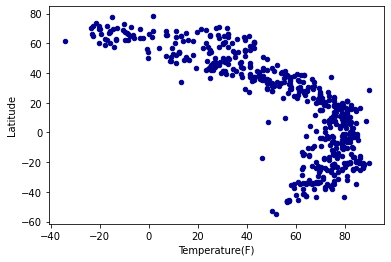

In [15]:
temp_plt = weather_df.plot.scatter(x='Temperature(F)',
                      y='Latitude',
                      c='DarkBlue')

In [ ]:
# In the above cell, each city is plotted according to it's latitude and temperature in Fahrenheit.

## Latitude vs. Humidity Plot

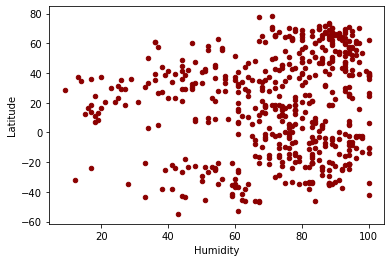

In [16]:
humidity_plt = weather_df.plot.scatter(x='Humidity',
                      y='Latitude',
                      c='DarkRed')

In [ ]:
# In the above cell, each city is plotted according to it's latitude and humidity percentage.

## Latitude vs. Cloudiness Plot

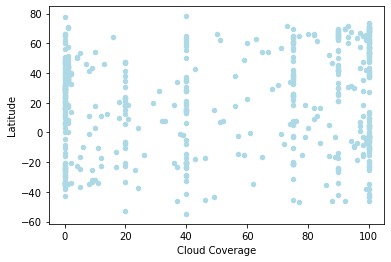

In [17]:
cloud_plt = weather_df.plot.scatter(x='Cloud Coverage',
                      y='Latitude',
                      c='LightBlue')

In [18]:
# In the above cell, each city is plotted according to it's latitude and cloud coverage percentage.

## Latitude vs. Wind Speed Plot

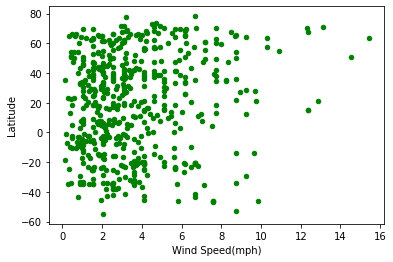

In [19]:
wind_plt = weather_df.plot.scatter(x='Wind Speed(mph)',
                      y='Latitude',
                      c='Green')

In [ ]:
# In the above cell, each city is plotted according to it's latitude and wind speed(mph).

## Linear Regression

In [ ]:
# create new dataframes from weather_df for northern and southern hemispheres
southern_hemi_df = weather_df.loc[(weather_df['Latitude']) <= 0]
northern_hemi_df = weather_df.loc[(weather_df['Latitude']) >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Temperature(F)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="darkblue")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Temperature(F)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# The correlation between latitude and humidity (while still present) is minimal.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Cloud Coverage']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="lightblue")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Cloud Coverage']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="lightblue")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# There is no correlation between a city's cloud coverage and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Wind Speed(mph)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Wind Speed(mph)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# There is no correlation between a city's latitude wind speed.